In [3]:
import pandas as pd 
import re 
from tests.Normalize_functions import clean_email, clean_text, normalize_phone, normalize_zip
import matplotlib.pyplot as plt
from itertools import combinations


df = pd.read_csv("data/clear_data.csv", dtype={"Phone_norm": str, "Zip_norm": str})

In [4]:
df.head(10)

,row_id,uid,Name_norm,City_norm,Street_norm,Email_norm,Zip_norm,Phone_norm
0,1,1,allison hill,new roberttown,donald cove 164,allison.hill@example.com,12781,0104332181
1,2,2,jonathan johnson,robinsonshire,jennifer squares 9,jonathan.johnson@example.com,36964,0013389083
2,3,3,abigail shaffer,port matthew,peterson drives 180,abigail.shaffer@example.com,12657,0863794026
3,4,4,ian cooper,herrerafurt,roman stream 40,ian.cooper@example.com,10829,0351161559
4,5,4,ian cooper,herrerafurt,roman stream 40,in.cooper@example.co,10829,0351161559
5,6,5,sandra montgomery,north donnaport,ray squares 75,sandra.montgomery@example.com,10959,0131647525
6,7,6,sharon james,west michael,reid lakes 172,sharon.james@example.com,88342,0419283276
7,8,6,sharon james,west michael,seid lakes 172,sharon.jame@example.com,88342,0419283276
8,9,7,timothy wong,south noah,amanda gardens 102,timothy.wong@example.com,84387,0724238849
9,10,8,colleen nguyen,richardland,jeremy bypass 150,colleen.nguyen@example.com,28154,0653287101


In [5]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       734 non-null    int64 
 1   uid          734 non-null    int64 
 2   Name_norm    734 non-null    object
 3   City_norm    734 non-null    object
 4   Street_norm  734 non-null    object
 5   Email_norm   734 non-null    object
 6   Zip_norm     734 non-null    object
 7   Phone_norm   734 non-null    object
dtypes: int64(2), object(6)
memory usage: 46.0+ KB


,row_id,uid,Name_norm,City_norm,Street_norm,Email_norm,Zip_norm,Phone_norm
count,734.000000,734.000000,734,734,734,734,734,734
unique,NaN,NaN,635,509,625,550,498,537
top,NaN,NaN,emily hayes,south andrea,taylor club 183,mr.christopher.walters@example.com,48812,0917135785
freq,NaN,NaN,3,4,3,3,3,3
mean,367.500000,249.040872,NaN,NaN,NaN,NaN,NaN,NaN
std,212.031837,145.136304,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,184.250000,124.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,367.500000,248.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,550.750000,375.750000,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#quality table 
def is_valid_email(email):
    if pd.isnull(email): return False
    pattern = r'^[\w\.-]+@[\w\.-]+\.\w+$'
    return re.match(pattern, str(email)) is not None

def is_valid_phone(phone, length=10):
    digits = re.sub(r'\D', '', str(phone))
    return len(digits) == length


def quality_table(df, sample_size=3):
    summary = []

    for col in df.columns:
        col_data = df[col]
        col_type = col_data.dtype
        missing_pct = col_data.isnull().mean() * 100
        unique_vals = col_data.nunique()

        # Длина значений (только для строк)
        avg_len = col_data.dropna().astype(str).apply(len).mean() if col_type == 'object' else None

        # Минимум и максимум (для числовых)
        min_val = col_data.min() if pd.api.types.is_numeric_dtype(col_data) else None
        max_val = col_data.max() if pd.api.types.is_numeric_dtype(col_data) else None

        # Примеры
        examples = col_data.dropna().unique()[:sample_size]

        # Проверка на битые форматы
        if "email" in col.lower():
            broken_pct = (~col_data.apply(is_valid_email)).mean() * 100
        elif "phone" in col.lower():
            broken_pct = (~col_data.apply(is_valid_phone)).mean() * 100
        else:
            broken_pct = None

        summary.append({
            "Признак": col,
            "Тип данных": str(col_type),
            "Пропуски (%)": round(missing_pct, 2),
            "Уникальных": unique_vals,
            "Средняя длина": round(avg_len, 2) if avg_len else None,
            "Минимум": min_val,
            "Максимум": max_val,
            "Битые форматы (%)": round(broken_pct, 2) if broken_pct is not None else None,
            "Примеры": examples
        })

    return pd.DataFrame(summary)

quality_df = quality_table(df)
print(quality_df)



       Признак Тип данных  Пропуски (%)  Уникальных  Средняя длина  Минимум  \
0       row_id      int64           0.0         734            NaN      1.0   
1          uid      int64           0.0         500            NaN      1.0   
2    Name_norm     object           0.0         635          13.24      NaN   
3    City_norm     object           0.0         509          11.68      NaN   
4  Street_norm     object           0.0         625          15.98      NaN   
5   Email_norm     object           0.0         550          25.25      NaN   
6     Zip_norm     object           0.0         498           4.92      NaN   
7   Phone_norm     object           0.0         537          10.00      NaN   

   Максимум  Битые форматы (%)  \
0     734.0                NaN   
1     500.0                NaN   
2       NaN                NaN   
3       NaN                NaN   
4       NaN                NaN   
5       NaN                0.0   
6       NaN                NaN   
7       NaN     

1    347
2     72
3     81
Name: count, dtype: int64

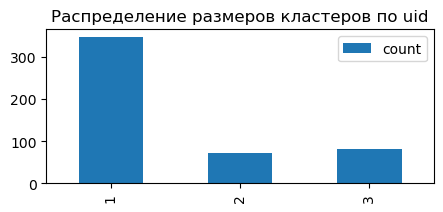

In [37]:
sizes = df.groupby('uid').size().value_counts().sort_index()
# гистограмма размеров кластеров и список самых больших кластеров
sizes.plot(kind='bar', title='Распределение размеров кластеров по uid', figsize=(5, 2), legend="1 Колона - одна запись на персону и тд")
sizes.head()

In [38]:
def key_metrics(df, cols, uid='uid'):
    groups = df.groupby(list(cols)).groups
    cand_pairs = 0
    true_pairs = 0
    for _, idxs in groups.items():
        idxs = list(idxs)
        m = len(idxs)
        if m < 2: 
            continue
        cand_pairs += m*(m-1)//2
        for i, j in combinations(idxs, 2):
            if df.at[i, uid] == df.at[j, uid]:
                true_pairs += 1
    row_coverage = df.duplicated(list(cols), keep=False).mean()
    pair_quality = true_pairs / cand_pairs if cand_pairs else 0.0
    return {'key': cols, 'row_coverage': row_coverage,
            'pair_quality': pair_quality, 'pairs': cand_pairs}

for cols in [('Email_norm',), ('Phone_norm',), ('Name_norm','Zip_norm'), ('Zip_norm','Street_norm')]:
    print(key_metrics(df, cols))


{'key': ('Email_norm',), 'row_coverage': 0.42779291553133514, 'pair_quality': 0.9831932773109243, 'pairs': 238}
{'key': ('Phone_norm',), 'row_coverage': 0.45776566757493187, 'pair_quality': 1.0, 'pairs': 255}
{'key': ('Name_norm', 'Zip_norm'), 'row_coverage': 0.2438692098092643, 'pair_quality': 1.0, 'pairs': 112}
{'key': ('Zip_norm', 'Street_norm'), 'row_coverage': 0.273841961852861, 'pair_quality': 1.0, 'pairs': 126}


In [16]:
from itertools import combinations
from rapidfuzz.distance import JaroWinkler
from rapidfuzz import fuzz
import pandas as pd

# 1) берём только uid с >1 записями
same_uid = df.groupby('uid').filter(lambda g: len(g) > 1)

rows = []
for uid, g in same_uid.groupby('uid'):
    for i, j in combinations(g.index, 2):
        a, b = df.loc[i], df.loc[j]
        rows.append({
            'uid': uid,
            # имена: Jaro-Winkler → 0..1
            'name_sim': JaroWinkler.normalized_similarity(
                str(a['Name_norm']).lower(), str(b['Name_norm']).lower()
            ),
            # адрес: Token Set Ratio → 0..100
            'street_sim': fuzz.token_set_ratio(
                str(a['Street_norm']).lower(), str(b['Street_norm']).lower()
            ),
            # город: строгая проверка + «мягкая»
            'city_eq': str(a['City_norm']).strip().lower() == str(b['City_norm']).strip().lower(),
            # zip: точное сравнение (после нормализации как строка)
            'zip_eq': str(a['Zip_norm']) == str(b['Zip_norm']),
            # email/phone: можно как точные, можно как «частичные»
            'email_user_eq': str(a['Email_norm']).split('@')[0].lower() == str(b['Email_norm']).split('@')[0].lower(),
            'phone_last4_eq': str(a['Phone_norm'])[-4:] == str(b['Phone_norm'])[-4:],
        })

pairs = pd.DataFrame(rows)

# Средние схожести и доли совпадений — ориентиры порогов
print(pairs[['name_sim','street_sim']].mean())
print(pairs[['city_eq','zip_eq','email_user_eq','phone_last4_eq']].mean())


name_sim       0.970164
street_sim    95.061703
dtype: float64
city_eq           0.920635
zip_eq            1.000000
email_user_eq     0.806349
phone_last4_eq    0.917460
dtype: float64


In [ ]:
# sizes_by_uid = df.groupby('uid').size()          # размер кластера на каждый uid
# hist = sizes_by_uid.value_counts().sort_index()  # как на графике

# n_rows = len(df)
# n_entities = sizes_by_uid.shape[0]

# share_singletons = (sizes_by_uid == 1).mean()                    # доля uid без дублей
# share_entities_with_dups = 1 - share_singletons                  # доля uid с дублями
# rows_in_multi = sizes_by_uid[sizes_by_uid > 1].sum()
# share_rows_in_multi = rows_in_multi / n_rows                     # доля строк, входящих в дубликатные кластеры
# avg_cluster_size = n_rows / n_entities                           # среднее число строк на персону
# max_cluster_size = sizes_by_uid.max()                            # максимальный размер кластера
# hist.head()                                                      # сами «1→кол-во, 2→кол-во, ...»


In [ ]:
# def dup_rate(col):
#     c = df[col].value_counts()
#     return (c[c>1].sum() / len(df))

# for cols in [('email',), ('phone',), ('name','zip'), ('zip','street')]:
#     print(cols, df.duplicated(list(cols), keep=False).mean())

# print(dup_rate('name'))

In [ ]:
# missing = df.isnull().sum()
# missing_percent = (missing / len(df)) * 100
# print(pd.DataFrame({'Missing': missing, 'Percent': missing_percent}))

In [ ]:
# for col in df.select_dtypes(include='object').columns:
#     print(f"{col}: {df[col].nunique()} уникальных")
#     print(df[col].value_counts().head(), "\n")

In [ ]:
# unique_counts = df.nunique()
# print(unique_counts.sort_values())

In [ ]:
# from itertools import combinations
# from rapidfuzz.distance import JaroWinkler
# from rapidfuzz import fuzz
# import pandas as pd

# g = df.groupby('uid').filter(lambda s: len(s)>1)
# rows=[]
# for uid, grp in g.groupby('uid'):
#     for i,j in combinations(grp.index, 2):
#         a,b = df.loc[i], df.loc[j]
#         rows.append({
#             'name_sim': JaroWinkler.normalized_similarity(str(a['Name_norm']).lower(), str(b['Name_norm']).lower()),
#             'street_sim': fuzz.token_set_ratio(str(a['Street_norm']).lower(), str(b['Street_norm']).lower()),
#             # 'zip_eq': str(a['zip'])==str(b['zip']),
#             # 'city_eq': str(a['city']).strip().lower()==str(b['city']).strip().lower(),
#         })
# pairs = pd.DataFrame(rows)
# pairs.describe()  # средние/квантили → пороги для кандидатов
